In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
i = pd.read_csv("../data/insurance.csv")
i.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
# we are predicting charges using the other vars


# EDA

In [7]:
i.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# check unique values in the categorical data
i.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
i['sex'] = i['sex'].astype('category')
i['sex'] = i['sex'].cat.codes
i.head(3)

age  sex    bmi  children smoker     region     charges
0   19    0  27.90         0    yes  southwest  16884.9240
1   18    1  33.77         1     no  southeast   1725.5523
2   28    1  33.00         3     no  southeast   4449.4620

In [10]:
i['smoker'] = i['smoker'].astype('category')
i['smoker'] = i['smoker'].cat.codes
i.head(3)

age  sex    bmi  children  smoker     region     charges
0   19    0  27.90         0       1  southwest  16884.9240
1   18    1  33.77         1       0  southeast   1725.5523
2   28    1  33.00         3       0  southeast   4449.4620

In [11]:
i['region'] = i['region'].astype('category')
i['region'] = i['region'].cat.codes
i.head(3)


age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       2   1725.5523
2   28    1  33.00         3       0       2   4449.4620

i

# Now lets solve the equations variables

In [12]:
# we take all columns excpet the charges
X = i.drop(columns='charges')
X

age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]

In [13]:
y = i['charges']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model = model.fit(X_train, Y_train)

In [17]:
y_pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(Y_test, y_pred)
mse

33635210.43117842

In [23]:
r2 = r2_score(Y_test, y_pred)
r2

0.7833463107364538

## Plotting

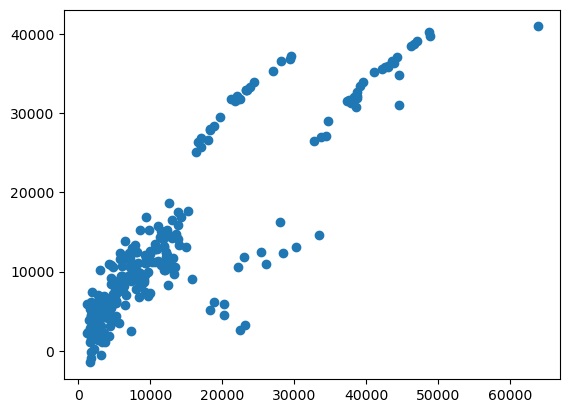